# 데이터 분석
> 1. 각 컬럼별 관중 수 관계 파악하기
> 2. 상관계수 확인하기

In [1]:
# 계산
import pandas as pd
import numpy as np
import holidays

# 차트
import seaborn as sns
import matplotlib.pyplot as plt

# 표준화
from sklearn.preprocessing import StandardScaler

# 예측 함수
from sklearn.cluster import KMeans

In [2]:
# 차트 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트 문제 해결 함수
def fontKorea():
    # 한글 폰트 문제 해결 
    # matplotlib은 한글 폰트를 지원하지 않음
    # os정보
    import platform

    # font_manager : 폰트 관리 모듈
    # rc : 폰트 변경 모듈
    from matplotlib import font_manager, rc
    # unicode 설정
    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows':
        path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")

In [4]:
# 데이터 열기
kiwoom_new = pd.read_csv('../Data/kiwoom_new.csv')
kiwoom_new.head()

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,...,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,...,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,...,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,...,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,...,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척


In [5]:
kiwoom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          171 non-null    object 
 1   팀명          171 non-null    object 
 2   순위          171 non-null    int64  
 3   총 경기수       171 non-null    int64  
 4   승리          171 non-null    int64  
 5   패배          171 non-null    int64  
 6   무승부         171 non-null    int64  
 7   승률          171 non-null    float64
 8   게임차         171 non-null    float64
 9   최근 10경기 전적  171 non-null    object 
 10  연속 승패 현황    171 non-null    object 
 11  홈 경기 전적     171 non-null    object 
 12  원정 경기 전적    171 non-null    object 
 13  요일          171 non-null    object 
 14  홈팀          171 non-null    object 
 15  원정팀         171 non-null    object 
 16  장소          171 non-null    object 
 17  관중 수        171 non-null    int64  
 18  시작시간        171 non-null    object 
 19  종료시간        171 non-null    o

----
## 필요 데이터 선별
----

In [6]:
# 날짜 데이터 타입 변환
kiwoom_new['날짜'] = kiwoom_new['날짜'].astype('datetime64[ns]')
kiwoom_new

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,...,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,...,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,...,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,...,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,...,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,키움,7,45,19,26,0,0.422,10.0,4승0무6패,...,키움,SSG,고척,10049,14:01,17:13,3:12,김인범,오원석,고척
167,2024-05-21,키움,8,46,19,27,0,0.413,10.0,4승0무6패,...,키움,NC,고척,3940,18:31,21:53,3:22,하영민,신민혁,고척
168,2024-05-22,키움,8,47,19,28,0,0.404,10.0,4승0무6패,...,키움,NC,고척,4337,18:31,21:54,3:23,후라도,하트,고척
169,2024-05-23,키움,8,48,20,28,0,0.417,9.0,5승0무5패,...,키움,NC,고척,3897,18:30,21:14,2:44,헤이수스,김시훈,고척


In [7]:
# 정보 확인
kiwoom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          171 non-null    datetime64[ns]
 1   팀명          171 non-null    object        
 2   순위          171 non-null    int64         
 3   총 경기수       171 non-null    int64         
 4   승리          171 non-null    int64         
 5   패배          171 non-null    int64         
 6   무승부         171 non-null    int64         
 7   승률          171 non-null    float64       
 8   게임차         171 non-null    float64       
 9   최근 10경기 전적  171 non-null    object        
 10  연속 승패 현황    171 non-null    object        
 11  홈 경기 전적     171 non-null    object        
 12  원정 경기 전적    171 non-null    object        
 13  요일          171 non-null    object        
 14  홈팀          171 non-null    object        
 15  원정팀         171 non-null    object        
 16  장소          171 non-null  

In [8]:
# 해당 열들은 하는 분석 내용과 상관이 없는 데이터 -> 삭제
kiwoom_new = kiwoom_new.drop(['팀명','홈팀','장소','구장','홈팀 선발','어웨이팀 선발'],axis=1)
kiwoom_new

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간
0,2022-04-02,6,1,0,1,0,0.000,1.0,0승0무1패,1패,0-0-1,0-0-0,토,롯데,8257,14:00,17:12,3:12
1,2022-04-03,4,2,1,1,0,0.500,1.0,1승0무1패,1승,1-0-1,0-0-0,일,롯데,6115,14:00,17:55,3:55
2,2022-04-05,6,3,1,2,0,0.333,2.0,1승0무2패,1패,1-0-2,0-0-0,화,LG,2298,18:30,21:34,3:04
3,2022-04-06,7,4,1,3,0,0.250,3.0,1승0무3패,2패,1-0-3,0-0-0,수,LG,2304,18:30,22:13,3:43
4,2022-04-07,7,5,1,4,0,0.200,4.0,1승0무4패,3패,1-0-4,0-0-0,목,LG,2055,18:30,21:01,2:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,7,45,19,26,0,0.422,10.0,4승0무6패,1승,10-0-14,9-0-12,일,SSG,10049,14:01,17:13,3:12
167,2024-05-21,8,46,19,27,0,0.413,10.0,4승0무6패,1패,10-0-15,9-0-12,화,NC,3940,18:31,21:53,3:22
168,2024-05-22,8,47,19,28,0,0.404,10.0,4승0무6패,2패,10-0-16,9-0-12,수,NC,4337,18:31,21:54,3:23
169,2024-05-23,8,48,20,28,0,0.417,9.0,5승0무5패,1승,11-0-16,9-0-12,목,NC,3897,18:30,21:14,2:44


In [9]:
kiwoom_new['시작시간'].unique()

array(['14:00', '18:30', '18:29', '17:00', '17:01', '13:59', '18:33',
       '14:01', '18:31', '18:00', '18:01'], dtype=object)

In [10]:
target_rows_18_30 = \
    kiwoom_new[
        (kiwoom_new['시작시간'] == '18:29') |
        (kiwoom_new['시작시간'] == '18:33') |
        (kiwoom_new['시작시간'] == '18:31') 
        ]

# 시작시간 변경
kiwoom_new.loc[target_rows_18_30.index, '시작시간'] = '18:30'

In [11]:
target_rows_14_00 = \
    kiwoom_new[
        (kiwoom_new['시작시간'] == '13:59') |
        (kiwoom_new['시작시간'] == '14:01')
        ]

# 시작시간 변경
kiwoom_new.loc[target_rows_14_00.index, '시작시간'] = '14:00'

In [12]:
target_rows_17_00 = \
    kiwoom_new[
        (kiwoom_new['시작시간'] == '17:01') |
        (kiwoom_new['시작시간'] == '18:00') |
        (kiwoom_new['시작시간'] == '18:01') 
        ]

# 시작시간 변경
kiwoom_new.loc[target_rows_17_00.index, '시작시간'] = '17:00'

In [13]:
kiwoom_new['시작시간'].unique()

array(['14:00', '18:30', '17:00'], dtype=object)

In [14]:
# 2022년부터 2024년까지 한국 공휴일 가져오기
kr_holidays = holidays.KR(years=[2022, 2023, 2024])

# 주말을 '빨간날'로 설정
kiwoom_new['휴일유무'] = kiwoom_new['날짜'].dt.dayofweek.apply(lambda x: '휴일' if x >= 5 else '평일')

# 공휴일을 '빨간날'로 설정
kiwoom_new['휴일유무'] = kiwoom_new['날짜'].apply(lambda x: '휴일' if x in kr_holidays else kiwoom_new.loc[kiwoom_new['날짜'] == x, '휴일유무'].values[0])

In [15]:
# 주말을 '빨간날'로 설정
kiwoom_new['주말평일'] = kiwoom_new['날짜'].dt.dayofweek.apply(lambda x: '주말' if x >= 5 else '평일')

----
## 2022~2023년 데이터와 2024년 데이터 분리
----

In [16]:
# 2022 ~ 2023년도 데이터
kiwoom_2022_2023 = \
    kiwoom_new[
        (kiwoom_new.날짜.dt.year == 2022) | 
        (kiwoom_new.날짜.dt.year == 2023)
        ]
kiwoom_2022_2023

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간,휴일유무,주말평일
0,2022-04-02,6,1,0,1,0,0.000,1.0,0승0무1패,1패,0-0-1,0-0-0,토,롯데,8257,14:00,17:12,3:12,휴일,주말
1,2022-04-03,4,2,1,1,0,0.500,1.0,1승0무1패,1승,1-0-1,0-0-0,일,롯데,6115,14:00,17:55,3:55,휴일,주말
2,2022-04-05,6,3,1,2,0,0.333,2.0,1승0무2패,1패,1-0-2,0-0-0,화,LG,2298,18:30,21:34,3:04,평일,평일
3,2022-04-06,7,4,1,3,0,0.250,3.0,1승0무3패,2패,1-0-3,0-0-0,수,LG,2304,18:30,22:13,3:43,평일,평일
4,2022-04-07,7,5,1,4,0,0.200,4.0,1승0무4패,3패,1-0-4,0-0-0,목,LG,2055,18:30,21:01,2:31,평일,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2023-09-21,10,134,53,78,3,0.405,27.0,2승0무8패,2승,30-2-35,23-1-43,목,NC,5178,18:30,21:18,2:48,평일,평일
139,2023-09-28,10,136,55,78,3,0.414,27.0,4승0무6패,4승,31-2-35,24-1-43,목,SSG,7082,17:00,19:59,2:59,휴일,평일
140,2023-09-29,10,137,55,79,3,0.410,27.0,4승0무6패,1패,31-2-36,24-1-43,금,KIA,14472,14:00,17:57,3:57,휴일,평일
141,2023-10-07,10,141,57,81,3,0.413,27.5,6승0무4패,2승,32-2-36,25-1-45,토,LG,13301,17:00,19:49,2:49,휴일,주말


In [17]:
# 2024년도 데이터
kiwoom_2024 = \
    kiwoom_new[
        (kiwoom_new.날짜.dt.year == 2024)
        ].reset_index(drop=True)
kiwoom_2024

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간,휴일유무,주말평일
0,2024-03-29,10,4,0,4,0,0.000,4.0,0승0무4패,4패,0-0-1,0-0-3,금,LG,8465,18:30,21:13,2:43,평일,평일
1,2024-03-30,8,5,1,4,0,0.200,4.0,1승0무4패,1승,1-0-1,0-0-3,토,LG,13462,17:00,19:45,2:44,휴일,주말
2,2024-03-31,7,6,2,4,0,0.333,4.0,2승0무4패,2승,2-0-1,0-0-3,일,LG,11822,14:00,16:49,2:49,휴일,주말
3,2024-04-05,5,9,5,4,0,0.556,2.5,5승0무4패,5승,3-0-1,2-0-3,금,한화,16000,18:30,21:31,3:01,평일,평일
4,2024-04-06,5,10,6,4,0,0.600,1.5,6승0무4패,6승,4-0-1,2-0-3,토,한화,16000,17:00,19:56,2:55,휴일,주말
5,2024-04-07,3,11,7,4,0,0.636,1.0,7승0무3패,7승,5-0-1,2-0-3,일,한화,16000,14:00,17:25,3:25,휴일,주말
6,2024-04-12,3,15,9,6,0,0.600,2.5,8승0무2패,2승,6-0-1,3-0-5,금,롯데,8838,18:30,21:31,3:01,평일,평일
7,2024-04-13,3,16,10,6,0,0.625,2.5,8승0무2패,3승,7-0-1,3-0-5,토,롯데,14197,17:00,19:52,2:52,휴일,주말
8,2024-04-14,3,17,11,6,0,0.647,2.5,8승0무2패,4승,8-0-1,3-0-5,일,롯데,12333,14:00,17:45,3:45,휴일,주말
9,2024-04-16,2,18,12,6,0,0.667,1.5,8승0무2패,5승,9-0-1,3-0-5,화,KT,2877,18:30,21:04,2:33,평일,평일


----
## 컬럼별 타겟 분석 시작
----

In [18]:
kiwoom_2022_2023['월'] = kiwoom_2022_2023['날짜'].dt.month

In [19]:
kiwoom_2024['월'] = kiwoom_2024['날짜'].dt.month

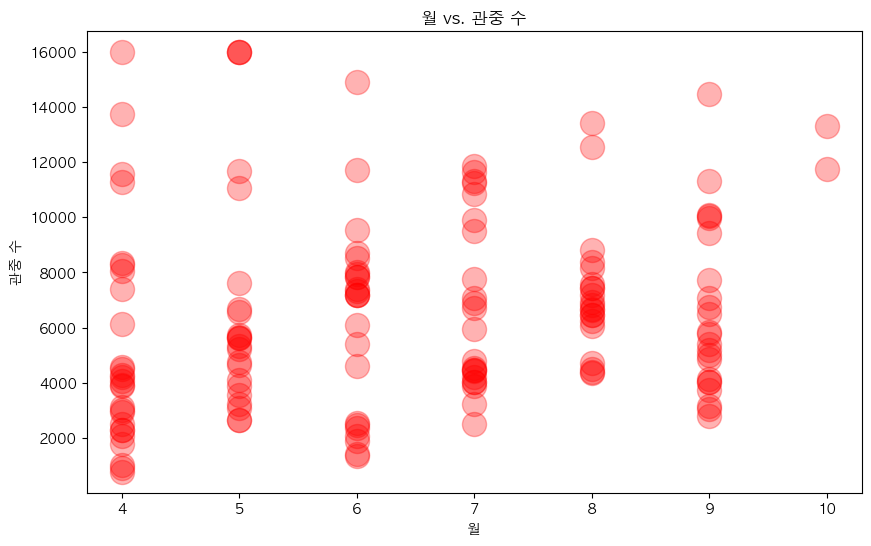

In [20]:
fontKorea()

# 월과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    kiwoom_2022_2023['월'], 
    kiwoom_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('월 vs. 관중 수')
plt.xlabel('월')
plt.ylabel('관중 수')
plt.show()

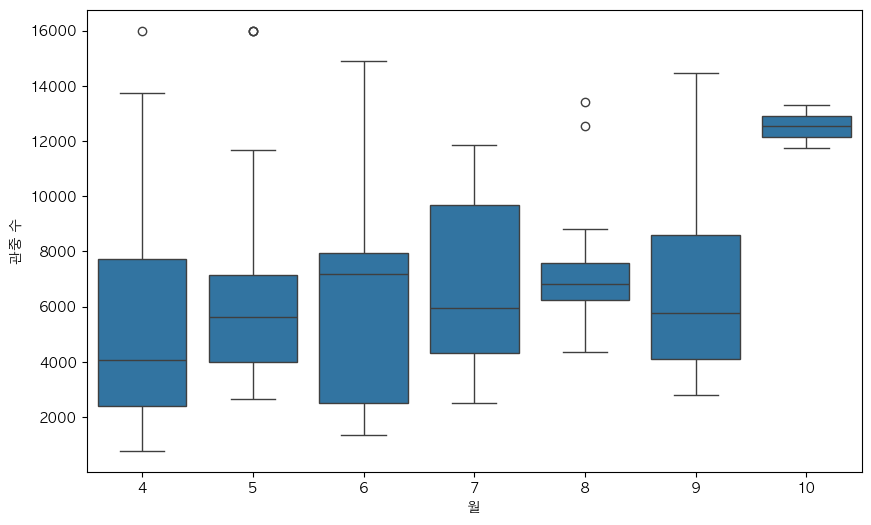

In [21]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='월', y='관중 수', data=kiwoom_2022_2023)
plt.title('')
plt.show()

In [22]:
# 10월 데이터 삭제
kiwoom_2022_2023 = \
    kiwoom_2022_2023.drop(
        kiwoom_2022_2023[
            kiwoom_2022_2023['월'] == 10
        ].index
    )

- 4~6월 -> 증가하는 추세
- 7~10월 -> 증가하는 추세
- 그러면 4~6월 시즌 전반
- 그러면 7~10월 시즌 후반

In [23]:
# 월을 숫자로 매핑
mapping = {
    4: 0,
    5: 0,
    6: 1,
    7: 1,
    8: 2,
    9: 2
}

# '시즌전반후반'컬럼 추가
kiwoom_2022_2023['시즌전반후반'] = kiwoom_2022_2023['월'].map(mapping)
kiwoom_2024['시즌전반후반'] = kiwoom_2024['월'].map(mapping)

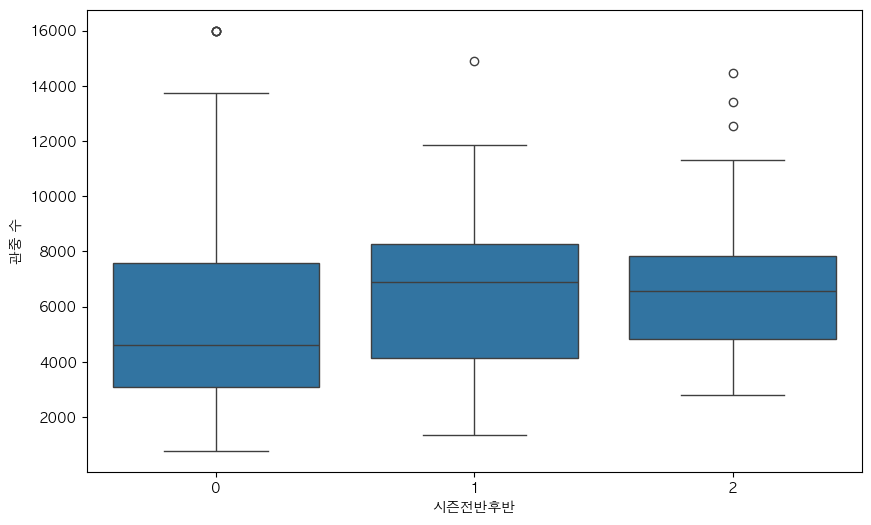

In [24]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='시즌전반후반', y='관중 수', data=kiwoom_2022_2023)
plt.title('')
plt.show()

In [25]:
kiwoom_2022_2023[['관중 수','시즌전반후반']].corr()

,관중 수,시즌전반후반
관중 수,1.000000,0.100812
시즌전반후반,0.100812,1.000000


In [26]:
# # 10월 데이터 삭제
# kiwoom_2022_2023 = \
#     kiwoom_2022_2023.drop(
#         kiwoom_2022_2023[
#             kiwoom_2022_2023['월'] == 10
#         ].index
#     )

In [27]:
# # 4월 관중 수 15000 이상 데이터 삭제
# kiwoom_2022_2023 = \
#     kiwoom_2022_2023.drop(
#         kiwoom_2022_2023[
#             (kiwoom_2022_2023['월'] == 4) & (kiwoom_2022_2023['관중 수'] >= 15000)
#         ].index
#     )

In [28]:
# # 5월 관중 수 10000 이상 데이터 삭제
# kiwoom_2022_2023 = \
#     kiwoom_2022_2023.drop(
#         kiwoom_2022_2023[
#             (kiwoom_2022_2023['월'] == 5) & (kiwoom_2022_2023['관중 수'] >= 10000)
#         ].index
#     )

In [29]:
# # 8월 관중 수 10000 이상 데이터 삭제
# kiwoom_2022_2023 = \
#     kiwoom_2022_2023.drop(
#         kiwoom_2022_2023[
#             (kiwoom_2022_2023['월'] == 8) & (kiwoom_2022_2023['관중 수'] >= 10000)
#         ].index
#     )

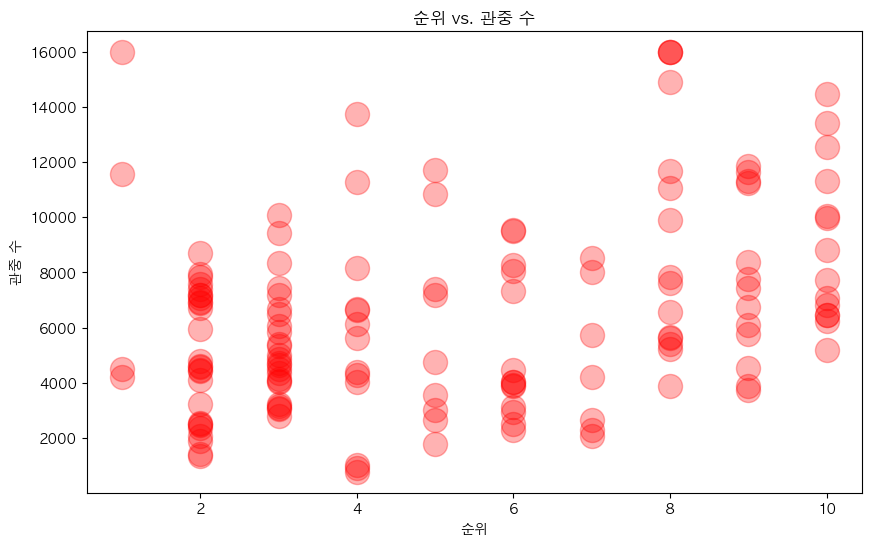

In [30]:
fontKorea()

# 월과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    kiwoom_2022_2023['순위'], 
    kiwoom_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('순위 vs. 관중 수')
plt.xlabel('순위')
plt.ylabel('관중 수')
plt.show()

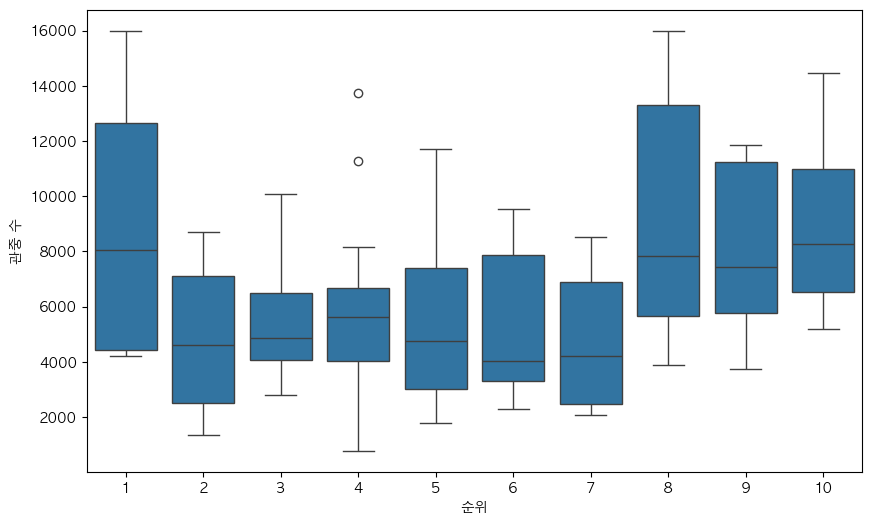

In [31]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='순위', y='관중 수', data=kiwoom_2022_2023)
plt.title('')
plt.show()

In [32]:
# # 4월 관중 수 15000 이상 데이터 삭제
# kiwoom_2022_2023 = \
#     kiwoom_2022_2023.drop(
#         kiwoom_2022_2023[
#             (kiwoom_2022_2023['순위'] == 4) & (kiwoom_2022_2023['관중 수'] >= 10000)
#         ].index
#     )

In [33]:
# # 4월 관중 수 15000 이상 데이터 삭제
# kiwoom_2022_2023 = \
#     kiwoom_2022_2023.drop(
#         kiwoom_2022_2023[
#             (kiwoom_2022_2023['순위'] == 8) & (kiwoom_2022_2023['관중 수'] >= 10000)
#         ].index
#     )

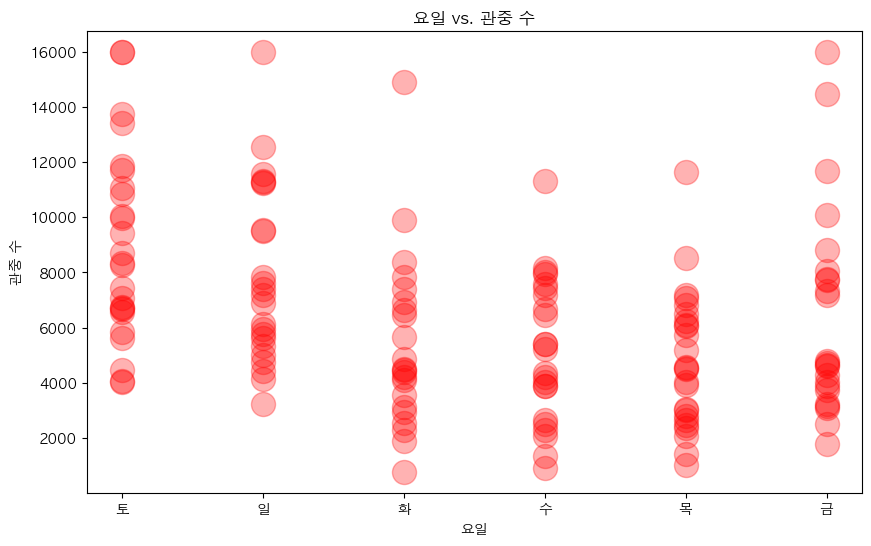

In [34]:
fontKorea()

# 월과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    kiwoom_2022_2023['요일'], 
    kiwoom_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('요일 vs. 관중 수')
plt.xlabel('요일')
plt.ylabel('관중 수')
plt.show()

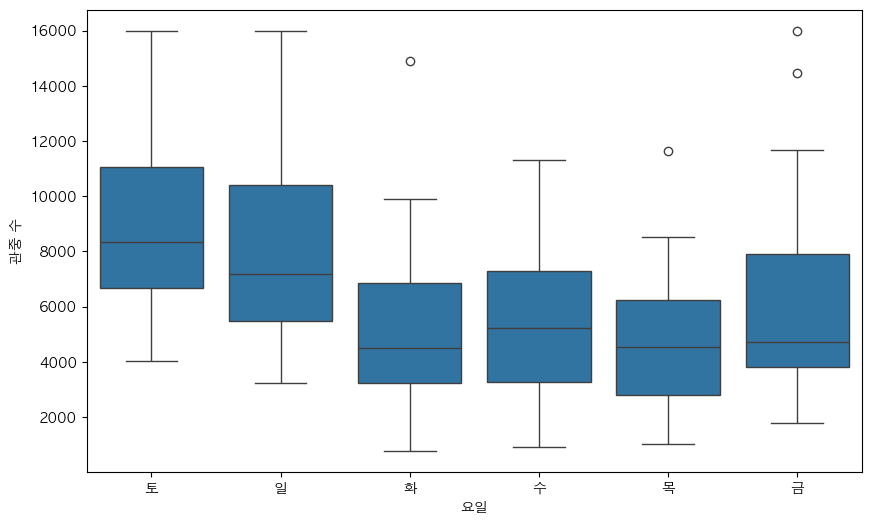

In [35]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='관중 수', data=kiwoom_2022_2023)
plt.title('')
plt.show()

In [36]:
# # 8월 관중 수 10000 이상 데이터 삭제
# kiwoom_2022_2023 = \
#     kiwoom_2022_2023.drop(
#         kiwoom_2022_2023[
#             (kiwoom_2022_2023['요일'] == '목') & (kiwoom_2022_2023['관중 수'] >= 10000)
#         ].index
#     )

In [37]:
# # 8월 관중 수 10000 이상 데이터 삭제
# kiwoom_2022_2023 = \
#     kiwoom_2022_2023.drop(
#         kiwoom_2022_2023[
#             (kiwoom_2022_2023['요일'] == '금') & (kiwoom_2022_2023['관중 수'] >= 10000)
#         ].index
#     )

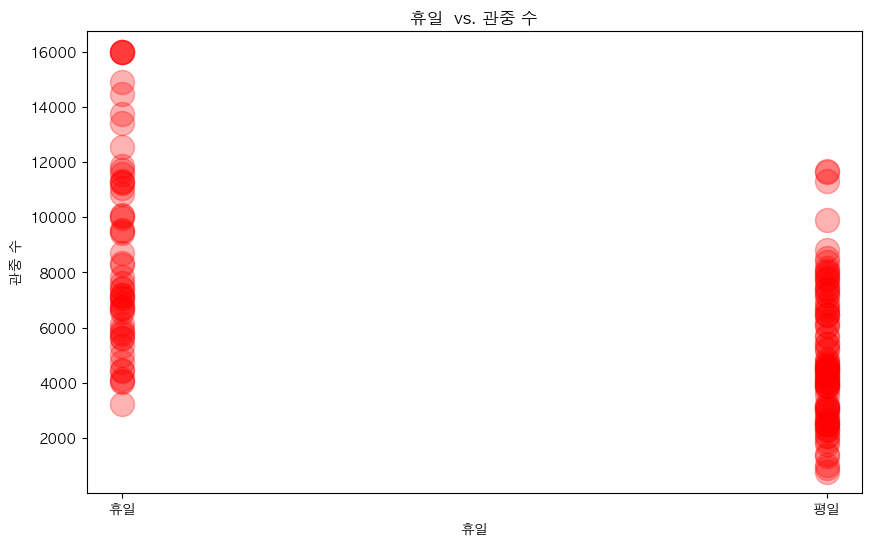

In [38]:
fontKorea()

# 휴일과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    kiwoom_2022_2023['휴일유무'], 
    kiwoom_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('휴일  vs. 관중 수')
plt.xlabel('휴일')
plt.ylabel('관중 수')
plt.show()

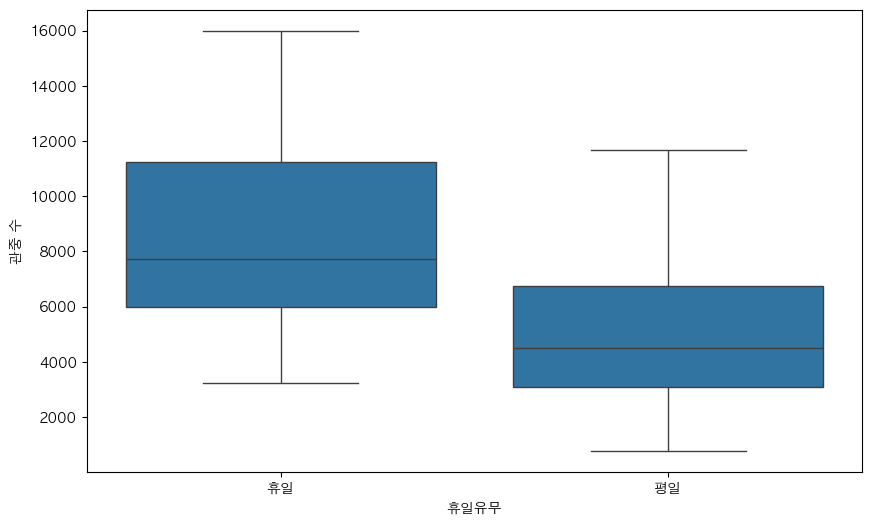

In [39]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='휴일유무', y='관중 수', data=kiwoom_2022_2023)
plt.title('')
plt.show()

In [40]:
# 요일을 숫자로 매핑
day_mapping = {
    '휴일': 1,
    '평일': 0
}

# '요일수치화' 컬럼 추가
kiwoom_2022_2023['휴일유무수치화'] = kiwoom_2022_2023['휴일유무'].map(day_mapping)
kiwoom_2024['휴일유무수치화'] = kiwoom_2024['휴일유무'].map(day_mapping)


In [41]:
kiwoom_2024[['관중 수','휴일유무수치화']].corr()

,관중 수,휴일유무수치화
관중 수,1.000000,0.668689
휴일유무수치화,0.668689,1.000000


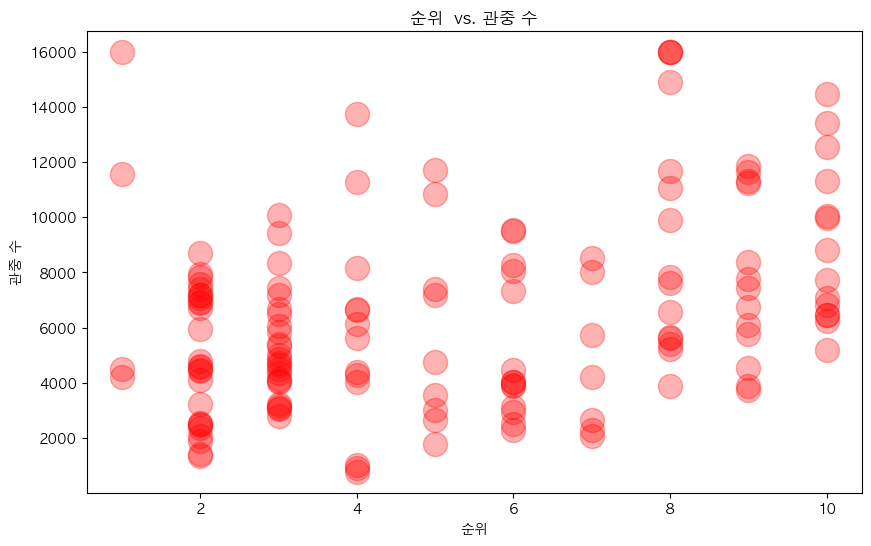

In [42]:
fontKorea()

# 순위과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    kiwoom_2022_2023['순위'], 
    kiwoom_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('순위  vs. 관중 수')
plt.xlabel('순위')
plt.ylabel('관중 수')
plt.show()

In [43]:
# 순위을 숫자로 매핑
mapping = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 1,
    5 : 1,
    6 : 1,
    7 : 2,
    8 : 2,
    9 : 2,
    10 : 2
}

# '요일수치화' 컬럼 추가
kiwoom_2022_2023['상중하위권표준화'] = kiwoom_2022_2023['순위'].map(mapping)
kiwoom_2024['상중하위권표준화'] = kiwoom_2024['순위'].map(mapping)


In [44]:
kiwoom_2022_2023[['관중 수','휴일유무수치화','상중하위권표준화']].corr()

,관중 수,휴일유무수치화,상중하위권표준화
관중 수,1.000000,0.536011,0.345114
휴일유무수치화,0.536011,1.000000,-0.022339
상중하위권표준화,0.345114,-0.022339,1.000000


In [45]:
# 순위을 숫자로 매핑
mapping = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 1,
    7 : 1,
    8 : 1,
    9 : 1,
    10 : 1
}

# '상하위권수치화' 컬럼 추가
kiwoom_2022_2023['상하위권표준화'] = kiwoom_2022_2023['순위'].map(mapping)
kiwoom_2024['상하위권표준화'] = kiwoom_2024['순위'].map(mapping)


In [46]:
# 순위을 숫자로 매핑
mapping = {
    1 : 1,
    2 : 1,
    3 : 1,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 1,
    9 : 1,
    10 : 1
}

# '요일수치화' 컬럼 추가
kiwoom_2022_2023['극과중위권수치화'] = kiwoom_2022_2023['순위'].map(mapping)
kiwoom_2024['극과중위권수치화'] = kiwoom_2024['순위'].map(mapping)


In [47]:
kiwoom_2022_2023[['관중 수','휴일유무수치화','상중하위권표준화','극과중위권수치화']].corr()

,관중 수,휴일유무수치화,상중하위권표준화,극과중위권수치화
관중 수,1.000000,0.536011,0.345114,0.192764
휴일유무수치화,0.536011,1.000000,-0.022339,0.141591
상중하위권표준화,0.345114,-0.022339,1.000000,-0.163337
극과중위권수치화,0.192764,0.141591,-0.163337,1.000000


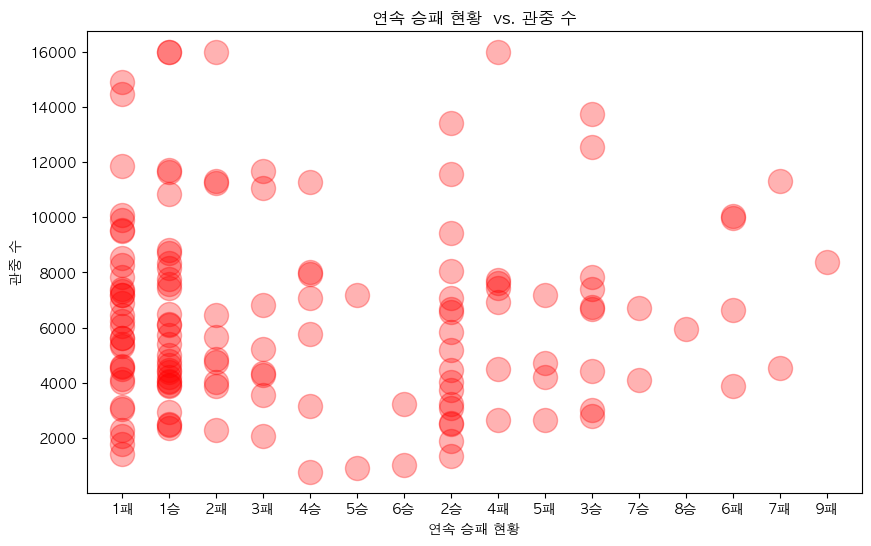

In [48]:
fontKorea()

# 휴일과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    kiwoom_2022_2023['연속 승패 현황'], 
    kiwoom_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('연속 승패 현황  vs. 관중 수')
plt.xlabel('연속 승패 현황')
plt.ylabel('관중 수')
plt.show()

In [49]:
# '패'가 포함된 경우 새로운 컬럼 만들기
kiwoom_2022_2023['승패현황수치화'] = \
    kiwoom_2022_2023['연속 승패 현황'].apply(lambda x: 0 if '패' in x else 1)
kiwoom_2024['승패현황수치화'] = \
    kiwoom_2024['연속 승패 현황'].apply(lambda x: 0 if '패' in x else 1)

In [50]:
kiwoom_2022_2023[['관중 수','휴일유무수치화','상중하위권표준화','상하위권표준화','승패현황수치화']].corr()

,관중 수,휴일유무수치화,상중하위권표준화,상하위권표준화,승패현황수치화
관중 수,1.000000,0.536011,0.345114,0.296610,-0.076195
휴일유무수치화,0.536011,1.000000,-0.022339,-0.062438,-0.016766
상중하위권표준화,0.345114,-0.022339,1.000000,0.863148,-0.237561
상하위권표준화,0.296610,-0.062438,0.863148,1.000000,-0.233155
승패현황수치화,-0.076195,-0.016766,-0.237561,-0.233155,1.000000


In [51]:
# 요일을 숫자로 매핑
mapping = {
    '화': 0,
    '수': 0,
    '목': 0,
    '금': 1,
    '토': 1,
    '일': 1,

}

# '요일수치화' 컬럼 추가
kiwoom_2022_2023['월_목금_일수치화'] = kiwoom_2022_2023['요일'].map(mapping)
kiwoom_2024['월_목금_일수치화'] = kiwoom_2024['요일'].map(mapping)


In [53]:
kiwoom_2022_2023[['관중 수','휴일유무수치화','상중하위권표준화','상하위권표준화','승패현황수치화','극과중위권수치화','월_목금_일수치화']].corr()

,관중 수,휴일유무수치화,상중하위권표준화,상하위권표준화,승패현황수치화,극과중위권수치화,월_목금_일수치화
관중 수,1.000000,0.536011,0.345114,0.296610,-0.076195,0.192764,0.390430
휴일유무수치화,0.536011,1.000000,-0.022339,-0.062438,-0.016766,0.141591,0.694731
상중하위권표준화,0.345114,-0.022339,1.000000,0.863148,-0.237561,-0.163337,-0.073683
상하위권표준화,0.296610,-0.062438,0.863148,1.000000,-0.233155,-0.055378,-0.106234
승패현황수치화,-0.076195,-0.016766,-0.237561,-0.233155,1.000000,0.060321,0.049507
극과중위권수치화,0.192764,0.141591,-0.163337,-0.055378,0.060321,1.000000,0.143344
월_목금_일수치화,0.390430,0.694731,-0.073683,-0.106234,0.049507,0.143344,1.000000


----
# k 값 찾기
----

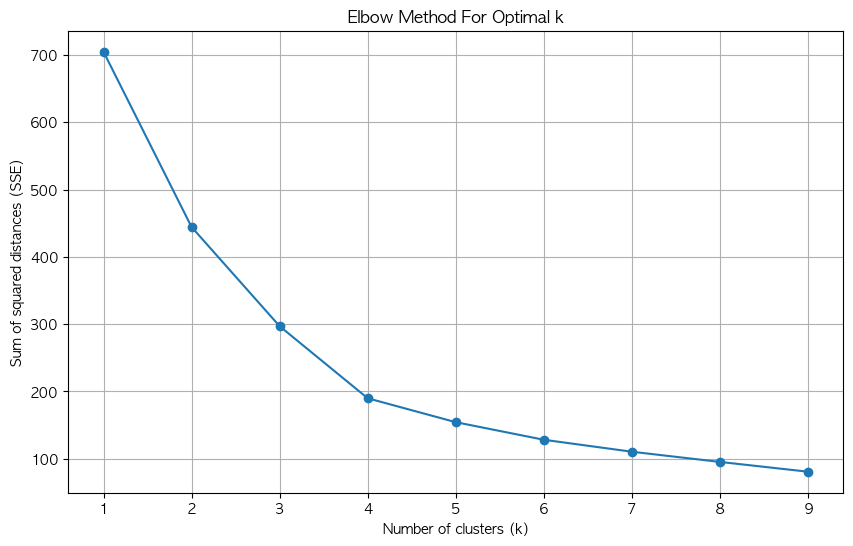

In [56]:
# 데이터 전처리
features = kiwoom_2022_2023[['휴일유무수치화','상중하위권표준화','상하위권표준화','월_목금_일수치화']]
target = kiwoom_2022_2023['관중 수']

# 관중 수 데이터를 reshape하여 2차원 배열로 전환
attendance_shape = np.array(target).reshape(-1, 1)

# features와 target과 결합 데이터
final_data = np.hstack((features, attendance_shape))

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_data)

# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
sse = []
k_range = range(1, 10)  # 3부터 15까지의 k 값에 대해 확인

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [57]:
# K-means 클러스터링
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(attendance_shape)
clusters

# 각 클러스터의 관중 수 범위 계산
cluster_ranges = {}

for cluster in range(4):
    cluster_data = \
        kiwoom_2022_2023[clusters == cluster]
    min_attendance = \
        cluster_data['관중 수'].min()
    max_attendance = \
        cluster_data['관중 수'].max()
    cluster_ranges[cluster] = (min_attendance, max_attendance)
cluster_ranges

{0: (774, 5178), 1: (9442, 12545), 2: (5232, 8817), 3: (13423, 16000)}

In [58]:
sorted(cluster_ranges.items(), key=lambda item: item[1][0])

[(0, (774, 5178)), (2, (5232, 8817)), (1, (9442, 12545)), (3, (13423, 16000))]

In [59]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2022_2023['관중수분류'] = \
    pd.cut(kiwoom_2022_2023['관중 수'], 
    bins=[0,5100,9000,13000,float('inf')], 
    labels=[
            '5000명 미만',
            '9000명 미만',
            '13000명 미만',
            '13000명 이상'

        ], 
    right=False)

In [60]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2024['관중수분류'] = \
    pd.cut(kiwoom_2024['관중 수'], 
    bins=[0,5100,9000,13000,float('inf')], 
    labels=[
            '5000명 미만',
            '9000명 미만',
            '13000명 미만',
            '13000명 이상'

        ], 
    right=False)

In [61]:
# 분류 예측 함수
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 앙상블 기법
from sklearn.ensemble import VotingClassifier

In [62]:
x = kiwoom_2022_2023[['휴일유무수치화','상중하위권표준화','상하위권표준화','월_목금_일수치화']]
y = kiwoom_2022_2023['관중수분류']
test_x = kiwoom_2024[['휴일유무수치화','상중하위권표준화','상하위권표준화','월_목금_일수치화']]
test_y = kiwoom_2024['관중수분류']

In [63]:
# 랜덤포레스트를 이용한 교차검증 10번 실시
cv_scores = []
for i in range(10):
    scores = cross_val_score(
        RandomForestClassifier(),
        x,
        y,
        cv=10,
        scoring='accuracy'
    )
    cv_scores.append(round(scores.mean(),4)*100)
cv_scores

[55.43, 54.71, 55.43, 57.57, 57.57, 55.43, 55.43, 55.43, 57.57, 54.71]

In [68]:
# 데이터 학습 시키고 예측하기
clf = RandomForestClassifier()
clf.fit(x,y)
clf.score(test_x, test_y)
pre = clf.predict(test_x)

# 정답률 구하기
# np.mean(pre == test_label)
from sklearn import metrics
ac_score = metrics.accuracy_score(test_y, pre)
cl_report = metrics.classification_report(test_y, pre)

print('정답률 =', ac_score)
print('리포트 =', cl_report)

정답률 = 0.39285714285714285
리포트 =               precision    recall  f1-score   support

   13000명 미만       0.43      0.38      0.40         8
   13000명 이상       0.00      0.00      0.00         8
    5000명 미만       0.38      0.50      0.43         6
    9000명 미만       0.38      0.83      0.53         6

    accuracy                           0.39        28
   macro avg       0.30      0.43      0.34        28
weighted avg       0.29      0.39      0.32        28



In [69]:
# 데이터 학습 시키고 예측하기
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x,y)
clf.score(test_x, test_y)
pre = clf.predict(test_x)

# 정답률 구하기
# np.mean(pre == test_label)
from sklearn import metrics
ac_score = metrics.accuracy_score(test_y, pre)
cl_report = metrics.classification_report(test_y, pre)

print('정답률 =', ac_score)
print('리포트 =', cl_report)

정답률 = 0.32142857142857145
리포트 =               precision    recall  f1-score   support

   13000명 미만       0.25      0.12      0.17         8
   13000명 이상       0.40      0.25      0.31         8
    5000명 미만       0.43      1.00      0.60         6
    9000명 미만       0.00      0.00      0.00         6

    accuracy                           0.32        28
   macro avg       0.27      0.34      0.27        28
weighted avg       0.28      0.32      0.26        28



In [71]:
# 데이터 학습 시키고 예측하기
svm = SVC()
svm.fit(x,y)
svm.score(test_x, test_y)
pre = svm.predict(test_x)

# 정답률 구하기
# np.mean(pre == test_label)
from sklearn import metrics
ac_score = metrics.accuracy_score(test_y, pre)
cl_report = metrics.classification_report(test_y, pre)

print('정답률 =', ac_score)
print('리포트 =', cl_report)

정답률 = 0.39285714285714285
리포트 =               precision    recall  f1-score   support

   13000명 미만       0.50      0.38      0.43         8
   13000명 이상       0.00      0.00      0.00         8
    5000명 미만       0.38      0.50      0.43         6
    9000명 미만       0.36      0.83      0.50         6

    accuracy                           0.39        28
   macro avg       0.31      0.43      0.34        28
weighted avg       0.30      0.39      0.32        28



In [72]:
x

,휴일유무수치화,상중하위권표준화,상하위권표준화,월_목금_일수치화
0,1,1,1,1
1,1,1,0,1
2,0,1,1,0
3,0,2,1,0
4,0,2,1,0
...,...,...,...,...
136,1,2,1,1
137,1,2,1,1
138,0,2,1,0
139,1,2,1,0


In [ ]:
test_x[0:1]

In [73]:
thiss = np.array([
    [0,0,1,1]
])

In [74]:
svm.predict(thiss)

array(['5000명 미만'], dtype=object)

In [75]:
import joblib
filename = '../Data/svm_kiwoom.h5'
joblib.dump(svm, filename)

['../Data/svm_kiwoom.h5']

In [ ]:
kiwoom_2022_2023["관중 수"]

In [ ]:
((kiwoom_2022_2023['날짜'].dt.month) * 100) + ((kiwoom_2022_2023['날짜'].dt.day))

In [ ]:
kiwoom_2022_2023['월일수치화'] = ((kiwoom_2022_2023['날짜'].dt.month) * 100) + ((kiwoom_2022_2023['날짜'].dt.day))
kiwoom_2022_2023.head()

In [ ]:
month_acc = kiwoom_2022_2023.sort_values(by='월일수치화').reset_index(drop=True)
month_acc.head()

In [ ]:
def scatterFunc(df,x,y,hue):
    # 날짜별 관중 수 산포도 및 선형회귀선 표시
    # 한글 패치
    fontKorea()

    plt.figure(figsize=(10,5))

    # 산점도 그리기
    sns.scatterplot(
        x=x,
        y=y,
        data=df,
    )

    # 플롯 표시
    plt.xlabel('날짜')
    plt.ylabel('관중 수(명)')
    plt.show()

In [ ]:
# 시작시간별 관중 수
x = kiwoom_2022_2023
y = kiwoom_2022_2023['관중 수']
# hue = kiwoom_2022_2023['시작시간']
scatterFunc(kiwoom_2022_2023,x,y)

In [ ]:
kiwoom_2022_2023

In [ ]:
kiwoom_2022_2023[['관중 수','순위']].corr()

In [ ]:
# 시작시간별 관중 수
start_acc = kiwoom_2022_2023
x = start_acc['요일'],
y = start_acc['관중 수_로그']
hue = start_acc['날짜']
scatterFunc(start_acc,x,y,hue)

In [ ]:
holiday_acc = kiwoom_2022_2023.sort_values(by='휴일유무').reset_index(drop=True)
x = holiday_acc.index
y = holiday_acc['관중 수_로그']
hue = holiday_acc['휴일유무']
scatterFunc(holiday_acc,x,y,hue)

In [ ]:
holiday_acc = kiwoom_2022_2023.sort_values(by='휴일유무').reset_index(drop=True)
x = holiday_acc.index
y = holiday_acc['관중 수_로그']
hue = holiday_acc['휴일유무']
scatterFunc(holiday_acc,x,y,hue)

In [ ]:
kiwoom_2022_2023[['날짜','관중 수']].corr()

In [ ]:
# 날짜별 관중 수 산포도 및 선형회귀선 표시
# 한글 패치
fontKorea()

plt.figure(figsize=(10,5))

# 산점도 그리기
sns.scatterplot(
    x='날짜',
    y='관중 수',
    data=kiwoom_2022_2023,
)

# 플롯 표시
plt.xlabel('날짜')
plt.ylabel('관중 수(명)')
plt.show()

In [ ]:
# 날짜별 관중 수 산포도 및 선형회귀선 표시
# 한글 패치
fontKorea()

plt.figure(figsize=(10,5))

# 산점도 그리기
sns.scatterplot(
    x=kiwoom_2022_2023['날짜'].dt.month,
    y='관중 수',
    data=kiwoom_2022_2023,
)

# 산점도 그리기
sns.regplot(
    x=kiwoom_2022_2023['날짜'].dt.month,
    y='관중 수',
    data=kiwoom_2022_2023,
    line_kws={'color': 'red'}  # 회귀선의 색상 설정
)

# 플롯 표시
plt.xlabel('월')
plt.ylabel('관중 수(명)')
plt.show()

In [ ]:
kiwoom_2022_2023[kiwoom_2022_2023['휴일유무']=='휴일'].index

In [ ]:
kiwoom_2022_2023[kiwoom_2022_2023['휴일유무']=='휴일'].head()

In [ ]:
# 날짜에 따른 관중 수 산포도
# 한글 패치
fontKorea()

test = kiwoom_2022_2023[(kiwoom_2022_2023['요일']=='토')|(kiwoom_2022_2023['요일']=='일')]

plt.figure(figsize=(10,5))

# 산점도 그리기
sns.scatterplot(
    # x=kiwoom_2022_2023.index,
    x=test.index,
    y='관중 수',
    hue=test['시작시간'],
    data=test,
)

# 회귀선 그리기
sns.regplot(
    # x=kiwoom_2022_2023.index,
    x=test.index,
    y='관중 수',
    data=test,
    scatter=False,  # 산점도는 그리지 않음
    line_kws={'color': 'red'}  # 회귀선의 색상 설정
)

# 범례 추가
# plt.legend(title='휴일유무', facecolor='white')

# 플롯 표시
plt.xlabel('날짜(인덱스)')
plt.ylabel('관중 수(명)')
plt.title('관중 수와 날짜의 관계(주말 - 시작시간)')
plt.show()

In [ ]:
# 날짜에 따른 관중 수 산포도
# 한글 패치
fontKorea()

plt.figure(figsize=(10,5))

# 산점도 그리기
sns.scatterplot(
    x=kiwoom_2022_2023.index,
    y='관중 수',
    hue='순위',
    data=kiwoom_2022_2023,
)

# 회귀선 그리기
sns.regplot(
    x=kiwoom_2022_2023.index,
    y='관중 수',
    data=kiwoom_2022_2023,
    scatter=False,  # 산점도는 그리지 않음
    line_kws={'color': 'red'}  # 회귀선의 색상 설정
)

# 범례 추가
plt.legend(title='순위', facecolor='white')

# 플롯 표시
plt.xlabel('날짜(인덱스)')
plt.ylabel('관중 수(명)')
plt.title('관중 수와 날짜의 관계 (순위에 따른 색상)')
plt.show()

In [ ]:
# 날짜에 따른 관중 수 산포도
# 한글 패치
fontKorea()

plt.figure(figsize=(10,5))

# 산점도 그리기
sns.scatterplot(
    x=kiwoom_2022_2023.index,
    y='관중 수',
    hue='순위',
    data=kiwoom_2022_2023,
)

# 회귀선 그리기
sns.regplot(
    x=kiwoom_2022_2023.index,
    y='관중 수',
    data=kiwoom_2022_2023,
    scatter=False,  # 산점도는 그리지 않음
    line_kws={'color': 'red'}  # 회귀선의 색상 설정
)

# 범례 추가
plt.legend(title='순위', facecolor='white')

# 플롯 표시
plt.xlabel('날짜(인덱스)')
plt.ylabel('관중 수(명)')
plt.title('관중 수와 날짜의 관계 (순위에 따른 색상)')
plt.show()

In [ ]:
kiwoom_2022_2023_copy = kiwoom_2022_2023.copy()
kiwoom_2022_2023_copy = kiwoom_2022_2023_copy[['관중 수','순위','요일','원정팀','시작시간','휴일유무']]
kiwoom_2022_2023_copy

In [ ]:
kiwoom_2024_copy = kiwoom_2024.copy()
kiwoom_2024_copy = kiwoom_2024_copy[['관중 수','순위','요일','원정팀','시작시간','휴일유무']]
kiwoom_2024_copy

In [ ]:
kiwoom_2022_2023_copy = pd.get_dummies(kiwoom_2022_2023_copy, columns=['요일','원정팀','시작시간','휴일유무'])
kiwoom_2022_2023_copy = kiwoom_2022_2023_copy.astype(int)
kiwoom_2022_2023_copy

In [ ]:
kiwoom_2024_copy = pd.get_dummies(kiwoom_2024_copy, columns=['요일', '원정팀','시작시간','휴일유무'])
kiwoom_2024_copy = kiwoom_2024_copy.astype(int)
kiwoom_2024_copy

In [ ]:
kiwoom_2022_2023_copy.corr()

In [ ]:
# k-mean로 관중 수 범위 나눌 k 값 찾기
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 전처리: 타깃 컬럼과 피쳐 컬럼 분리
features = kiwoom_2022_2023_copy.drop(columns=['관중 수'])
target = kiwoom_2022_2023_copy['관중 수']

attendance_shape = np.array(target).reshape(-1,1)

# 특성 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(attendance_shape)

# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
sse = []
k_range = range(3, 15)  # 3부터 15까지의 k 값에 대해 확인

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(attendance_shape)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [ ]:
# K-means 클러스터링
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(attendance_shape)
clusters

# 각 클러스터의 관중 수 범위 계산
cluster_ranges = {}

for cluster in range(5):
    cluster_data = \
        kiwoom_2022_2023_copy[clusters == cluster]
    min_attendance = \
        cluster_data['관중 수'].min()
    max_attendance = \
        cluster_data['관중 수'].max()
    cluster_ranges[cluster] = (min_attendance, max_attendance)
cluster_ranges

In [ ]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2022_2023_copy['관중수 분류'] = \
    pd.cut(kiwoom_2022_2023_copy['관중 수'], 
    bins=[0, 3300, 6000, 9100, 12900, float('inf')], 
    labels=[
            '3300 미만',
            '6000 미만',
            '9100 미만',
            '12900 미만',
            '16000 미만'
        ], 
    right=False)

In [ ]:
kiwoom_2022_2023_copy

In [ ]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2024_copy['관중수 분류'] = \
    pd.cut(kiwoom_2024_copy['관중 수'], 
    bins=[0, 3300, 6000, 9100, 12900, float('inf')], 
    labels=[
            '3300 미만',
            '6000 미만',
            '9100 미만',
            '12900 미만',
            '16000 미만'
        ], 
    right=False)

In [ ]:
kiwoom_2024_copy

In [ ]:
select['순위제곱'] = select['순위']**2
select

In [ ]:
select['순위제곱근'] = select['순위'] ** 0.5
select

In [ ]:
select['순위'] = select['순위'] * 0.1

In [ ]:
# 분류 예측 함수
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 앙상블 기법
from sklearn.ensemble import VotingClassifier

In [ ]:
x = kiwoom_2022_2023_copy.drop(columns=['관중 수','관중수 분류'])
y = kiwoom_2022_2023_copy['관중수 분류']
test_x = kiwoom_2024_copy.drop(columns=['관중 수','관중수 분류'])
test_y = kiwoom_2024_copy['관중수 분류']

In [ ]:
# 랜덤포레스트를 이용한 교차검증 10번 실시
cv_scores = []
for i in range(10):
    scores = cross_val_score(
        RandomForestClassifier(),
        x,
        y,
        cv=10,
        scoring='accuracy'
    )
    cv_scores.append(scores.mean())
cv_scores

In [ ]:
# 데이터 학습 시키고 예측하기
clf = RandomForestClassifier()
clf.fit(x,y)
clf.score(test_x, test_y)
pre = clf.predict(test_x)

# 정답률 구하기
# np.mean(pre == test_label)
from sklearn import metrics
ac_score = metrics.accuracy_score(test_y, pre)
cl_report = metrics.classification_report(test_y, pre)

print('정답률 =', ac_score)
print('리포트 =', cl_report)

In [ ]:
# 데이터 분류
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# 모델 평가
def evaluate_model(model, X, y, test_size=0.2, random_state=42, metric='accuracy'):
    """
    모델의 과대적합 및 과소적합 여부를 평가하는 함수.

    Parameters:
    - model: Scikit-learn 모델 객체
    - X: 특징 데이터
    - y: 타겟 데이터
    - test_size: 테스트 데이터 비율 (기본값: 0.2)
    - random_state: 랜덤 시드 (기본값: 42)
    - metric: 성능 평가 지표 ('accuracy', 'precision', 'recall', 'f1' 중 선택, 기본값: 'accuracy')

    Returns:
    - 성능 평가 결과 (훈련 및 테스트 성능)
    """
    
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # 모델 훈련
    model.fit(X_train, y_train)
    
    # 예측
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 성능 평가
    metrics = {
        'accuracy': accuracy_score,
        'precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'f1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }
    
    if metric not in metrics:
        raise ValueError(f"지원하지 않는 평가 지표입니다: {metric}")
    
    train_metric = metrics[metric](y_train, y_train_pred)
    test_metric = metrics[metric](y_test, y_test_pred)
    
    print(f'훈련 예측율 : {train_metric.round(4)*100}')
    print(f'실제 예측율 : {test_metric.round(4)*100}')
    
    if train_metric > test_metric and train_metric - test_metric > 0.1:
        print("모델이 과대적합된 것으로 보입니다.")
    elif train_metric < 0.8 and test_metric < 0.8:
        print("모델이 과소적합된 것으로 보입니다.")
    else:
        print("모델이 적절하게 학습되었습니다.")
    
    return train_metric, test_metric


In [ ]:
# 학습 곡선 그리기
def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    """
    모델의 학습 곡선을 그리는 함수.

    Parameters:
    - model: Scikit-learn 모델 객체
    - X: 특징 데이터
    - y: 타겟 데이터
    - cv: 교차 검증 폴드 수 (기본값: 5)
    - train_sizes: 훈련 데이터 크기 비율 (기본값: np.linspace(0.1, 1.0, 10))
    - scoring: 성능 평가 지표 (기본값: 'accuracy')
    """
    
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
    
    plt.xlabel('Training Size')
    plt.ylabel(scoring.capitalize())
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


In [ ]:
# 교차 검증 점수 계산
def cross_validation_scores(model, X, y, cv=5, scoring='accuracy'):
    """
    모델의 교차 검증 점수를 계산하는 함수.

    Parameters:
    - model: Scikit-learn 모델 객체
    - X: 특징 데이터
    - y: 타겟 데이터
    - cv: 교차 검증 폴드 수 (기본값: 5)
    - scoring: 성능 평가 지표 (기본값: 'accuracy')

    Returns:
    - 교차 검증 점수 배열
    """
    
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    print(f'교차검증 점수: {scores.round(4)*100}')
    print(f'교차검증 평균 점수: {np.mean(scores).round(4)*100}')
    
    return scores.round(4)*100


In [ ]:
# 1. SVM 모델
svm_model = SVC()

print("\n=== SVM 평가 ===")
evaluate_model(svm_model, x, y, metric='accuracy')
plot_learning_curve(svm_model, x, y, scoring='accuracy')
cross_validation_scores(svm_model, x, y, scoring='accuracy')

# 2. k-최근접 이웃 모델
knn_model = KNeighborsClassifier(n_neighbors=3)

print("\n=== k-최근접 이웃 평가 ===")
evaluate_model(knn_model, x, y, metric='accuracy')
plot_learning_curve(knn_model, x, y, scoring='accuracy')
cross_validation_scores(knn_model, x, y, scoring='accuracy')

# 3. 의사결정나무 모델
tree_model = tree.DecisionTreeClassifier()

print("\n=== 의사결정나무 평가 ===")
evaluate_model(tree_model, x, y, metric='accuracy')
plot_learning_curve(tree_model, x, y, scoring='accuracy')
cross_validation_scores(tree_model, x, y, scoring='accuracy')

In [ ]:
from sklearn.linear_model import SGDClassifier

# 데이터 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 경사 하강법을 사용한 분류 모델 훈련
sgd_clf = SGDClassifier(loss='log', max_iter=1000, learning_rate='optimal', tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

# 훈련 데이터와 테스트 데이터의 예측 성능 평가
train_pred = sgd_clf.predict(X_train)
test_pred = sgd_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# 학습 곡선 그리기
train_sizes, train_scores, test_scores = learning_curve(sgd_clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fontKorea()

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def train_and_evaluate(X_train, y_train, X_test, y_test):
    """
    학습 데이터와 테스트 데이터를 입력받아 모델을 훈련하고 성능을 평가하여 결과를 반환하는 함수.

    Parameters:
    - X_train: 학습용 특징 데이터
    - y_train: 학습용 타겟 데이터
    - X_test: 테스트용 특징 데이터
    - y_test: 테스트용 타겟 데이터

    Returns:
    - train_accuracy: 학습 데이터에 대한 정확도
    - test_accuracy: 테스트 데이터에 대한 정확도
    """

    # 경사 하강법을 사용한 분류 모델 훈련
    sgd_clf = SGDClassifier(loss='log', max_iter=1000, learning_rate='optimal', tol=1e-3, random_state=42)
    sgd_clf.fit(X_train, y_train)

    # 훈련 데이터와 테스트 데이터에 대한 예측
    train_pred = sgd_clf.predict(X_train)
    test_pred = sgd_clf.predict(X_test)

    # 훈련 데이터와 테스트 데이터에 대한 정확도 계산
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    # 학습 곡선 그리기
    train_sizes, train_scores, test_scores = learning_curve(sgd_clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, label='Validation accuracy', color='green')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    plt.show()

    return train_accuracy, test_accuracy

# 학습 데이터와 테스트 데이터로 함수 호출하여 결과 확인
train_acc, test_acc = train_and_evaluate(x, y, test_x, test_y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate_logistic(X_train, y_train, X_test, y_test, C):
    """
    로지스틱 회귀를 사용하여 모델을 훈련하고 성능을 평가하는 함수.

    Parameters:
    - X_train: 학습용 특징 데이터
    - y_train: 학습용 타겟 데이터
    - X_test: 테스트용 특징 데이터
    - y_test: 테스트용 타겟 데이터
    - C: 규제 강도

    Returns:
    - train_accuracy: 훈련 데이터에 대한 정확도
    - test_accuracy: 테스트 데이터에 대한 정확도
    """

    # 로지스틱 회귀 모델 훈련
    logistic_reg = LogisticRegression(C=C, random_state=42)
    logistic_reg.fit(X_train, y_train)

    # 훈련 데이터와 테스트 데이터에 대한 예측
    train_pred = logistic_reg.predict(X_train)
    test_pred = logistic_reg.predict(X_test)

    # 훈련 데이터와 테스트 데이터에 대한 정확도 계산
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    # 분류 보고서 출력
    print("\nClassification Report:")
    print(classification_report(y_test, test_pred))

    # 학습 곡선 그리기
    train_sizes, train_scores, test_scores = learning_curve(logistic_reg, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, label='Validation accuracy', color='green')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    plt.show()

    return train_accuracy, test_accuracy

# 로지스틱 회귀 모델을 훈련하고 평가
C = 0.1  # 규제 강도
train_acc, test_acc = train_and_evaluate_logistic(x, y, test_x, test_y, C)
